In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
ls *.csv

history_original.csv  history_without_ci_int.csv


In [3]:
filenames = [
    'history_original.csv', 
    'history_without_ci_int.csv'
]
histories = {}

In [4]:
for filename in filenames:
    key = filename[:-4] # Берем часть имени до расширения ".csv"
    histories[key] = pd.read_csv(filename)

In [5]:
hist_orig = histories['history_original']
hist_orig.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,1.483210,0.621451,1.483209,3.582701,0.799457,3.582700,995
996,1.483877,0.621943,1.483877,3.581052,0.801285,3.581052,996
997,1.480800,0.621291,1.480801,3.575560,0.800175,3.575561,997
998,1.481602,0.621693,1.481602,3.581033,0.800440,3.581033,998
999,1.481354,0.621374,1.481354,3.565535,0.799845,3.565535,999


In [6]:
hist_wo_ci_int = histories['history_without_ci_int']
hist_wo_ci_int.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.574805,0.793218,2.574805,3.831527,0.917268,3.831527,995
996,2.571660,0.792900,2.571659,3.828178,0.916740,3.828179,996
997,2.572505,0.793087,2.572504,3.846315,0.919637,3.846315,997
998,2.569088,0.792812,2.569089,3.829494,0.916301,3.829494,998
999,2.573501,0.793670,2.573500,3.840662,0.917394,3.840662,999


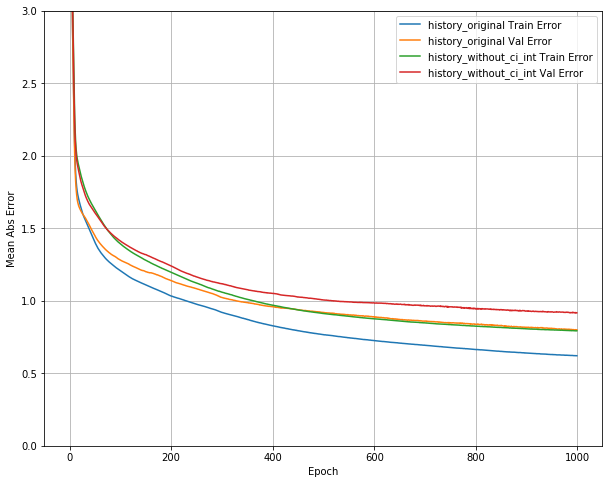

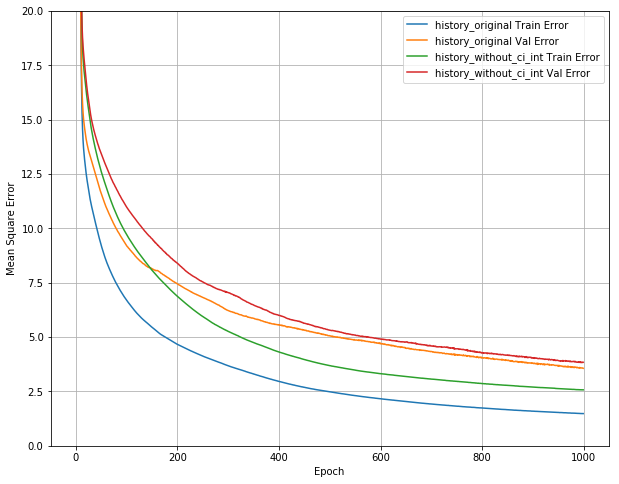

In [8]:
def plot_history(histories={}):  
    # MAE   
    fig_mae = plt.figure(figsize=(10, 8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.grid()
    plt.ylim([0,3])

    for (key, hist) in histories.items():
        plt.plot(hist['epoch'], hist['mean_absolute_error'],
               label=key + ' Train Error')
        plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
               label = key + ' Val Error')

    plt.legend()
    
    
    # MSE
    fig_mse = plt.figure(figsize=(10, 8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.grid()
    plt.ylim([0,20])

    for (key, hist) in histories.items():
        plt.plot(hist['epoch'], hist['mean_squared_error'],
               label=key + ' Train Error')
        plt.plot(hist['epoch'], hist['val_mean_squared_error'],
               label = key + ' Val Error')
    
    plt.legend()

    return [fig_mae, fig_mse]
    

[fig_mae, fig_mse] = plot_history(histories)
# Save pics
datetime_iso8601 = datetime.datetime.now().isoformat().split('.')[0]
fig_mae.savefig('mae_' + datetime_iso8601 + '.png')
fig_mse.savefig('mse_' + datetime_iso8601 + '.png')